### Key concepts
1. Distributions are where data comes from

2. Gaussian distribution

3. Mean & standard deviation

4. Percentiles & outliers

5. Power law distribution

In [0]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import random
from IPython.core.display import clear_output

def coin_flip(p=0.5):
    val = random.random()
    if val < p:
        return 1 # Heads
    else:
        return 0 # Tails

def roll_dice():
    val1 = int(random.random() * 6) + 1
    val2 = int(random.random() * 6) + 1
    return val1 + val2
    
def coin_flips(n=10):
    res = 0
    for i in range(n):
        res += coin_flip()
    return res

def random_avg(n=10):
    res = 0
    for i in range(n):
        res += 10 * random.random()
    return res / n

def simulate(f, runs=100):
    return pd.DataFrame({'Val': [f() for i in range(runs)]})

def show_counts(df):
    df = df.assign(Count=1)
    df = df.groupby('Val').count()
    return df

def histogram(df, bins=10, range=None):
    if isinstance(df, pd.Series):
        df = pd.DataFrame({df.name: df})
    counts = df.assign(Count=1)
    col_name = df.columns[0]
    counts = counts.groupby(col_name).count()
    df.plot.hist(bins=bins, range=range)
    plt.show()
    if counts.shape[0] < 30:
        return counts

### 1. Distributions
We think of data as coming from a distribution. A distribution is a random process that produces individual data points.  
A distribution is like a person, and data is like a photograph of that person.
The more data points you have, the more you know about the true distribution, like a high-resolution photograph.

#### Dice Rolls

We can analyze a distribution by making repeated random simulations and plotting a histogram of the results. Here, we simulate rolling dice 100 times.

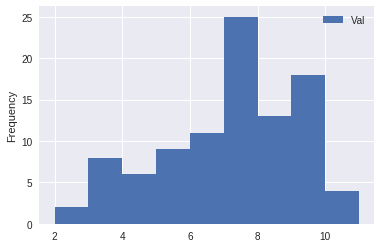

,Count
Val,
2,2
3,8
4,6
5,9
6,11
7,25
8,13
9,18
10,1


In [9]:
histogram(simulate(f=roll_dice, runs=100), bins=range(2, 12))

To understand why the distribution has this shape, consider that every square in this diagram represents an equally likely outcome.

<img src="https://github.com/haroldfox/ts-stuy-2019/blob/master/images/dicediagram.jpg?raw=1" style="width: 300px;">
[(source)](https://casmusings.wordpress.com/about/)

#### Coin Flips
Here is a simulation of flipping a coin 10 times. Flipping many coins approximates a bell curve distribution. 

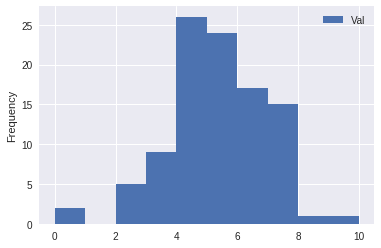

,Count
Val,
0,2
2,5
3,9
4,26
5,24
6,17
7,15
8,1
9,1


In [10]:
histogram(simulate(f=coin_flips, runs=100), bins=range(0, 11))

In [0]:
# Implement a distribution
# this function should flip a coin repeatedly until you get a head. it should return the number of coin flips required. 
def coin_flips_to_head():
    return ...

In [0]:
histogram(simulate(f=coin_flips_to_head))

### 2. The Gaussian (Normal) distribution
A Gaussian distribution is a bell curve, where data clusters around a central mean.
This is the most common distribution of data. Height, test scores, and commute times all look like Gaussians.
It's so common because the sum of random numbers always looks has a Gaussian distribution.

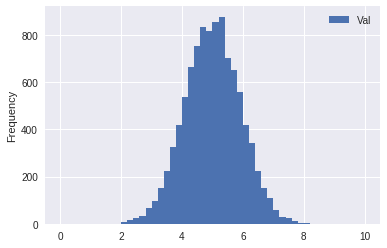

In [11]:
# the more data points we have, the closer our data looks like the true distribution
flips = []
for _ in range(100):
    flips.append(simulate(f=random_avg, runs=100))
    clear_output(wait=True)
    histogram(pd.concat(flips), bins=50, range=(0, 10))

In [0]:
!git clone https://<user>:<pass>@github.com/haroldfox/ts-stuy-2019

Cloning into 'ts-stuy-2019'...
remote: Enumerating objects: 96, done.
remote: Counting objects: 100% (96/96), done.
remote: Compressing objects: 100% (88/88), done.
remote: Total 96 (delta 32), reused 32 (delta 4), pack-reused 0
Unpacking objects: 100% (96/96), done.


## Real-world Data: NBA Player Statistics 🏀

Let's load a dataset of NBA player statistics to see how these distributions come up in the real world.

![](https://github.com/haroldfox/ts-stuy-2019/blob/master/images/nickyoung.gif?raw=1)

In [23]:
nba = pd.read_hdf('ts-stuy-2019/datasets/nba.h5')
for col in nba.columns:
    if col not in ['Player', 'Pos', 'Tm']:
        nba[col] = pd.to_numeric(nba[col])

IOError: ignored

The data has some basic data for each player:

- **Player**: The player's name
- **Tm**: The player's team. *Players who were traded within the season are listed multiple times.*
- **Pos**: The player's position ([reference](https://en.wikipedia.org/wiki/Basketball_positions))
- **Age**: The player's age
- **2P, 2PA, 2P%**: The player's 2-pointer stats (goals made, attempts, percentage)
- **3P, 3PA, 3P%**: The player's 3-pointer stats
- **FT, FTA, FT%**: The player's free throw stats
- Plenty of others, see [this reference](https://en.wikipedia.org/wiki/Basketball_statistics)

Use `.head()` to have a look at the first few rows to familiarize yourself with the data.

In [0]:
nba.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Alex Abrines,SG,25,OKC,31,2,588,56,157,0.357,...,0.923,5,43,48,20,17,6,14,53,165
1,Quincy Acy,PF,28,PHO,10,0,123,4,18,0.222,...,0.700,3,22,25,8,1,4,4,24,17
2,Jaylen Adams,PG,22,ATL,21,0,221,22,59,0.373,...,1.000,7,23,30,35,6,2,15,20,64
3,Steven Adams,C,25,OKC,67,67,2265,415,689,0.602,...,0.525,318,326,644,105,104,54,119,173,966
4,Bam Adebayo,C,21,MIA,67,14,1493,207,358,0.578,...,0.741,133,313,446,141,51,52,94,172,558


### 3-Pointer histogram

Here is a histogram of 3-point shooting % (for players with at least 20 attempts)

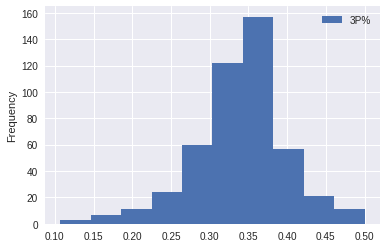

In [0]:
histogram(nba[nba['3PA'] >= 20]['3P%'])

## Make a histogram of each player's free throw shooting %


In [0]:
# Your code here

Let's see who is in the bottom bucket.

In [0]:
nba[nba.FTA > 20].sort_values('FT%')[['FT', 'FTA', 'Player', 'FT%']].head(8)

,FT,FTA,Player,FT%
657,11,28,D.J. Wilson,0.393
34,20,48,Lonzo Ball,0.417
647,90,206,Hassan Whiteside,0.437
115,12,26,Michael Carter-Williams,0.462
64,10,21,Jonah Bolden,0.476
633,16,33,Dion Waiters,0.485
637,26,51,Tyrone Wallace,0.510
160,15,29,Sam Dekker,0.517


In [0]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/L_Knvctdm-8?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')

## Plot a histogram of NBA players' age. Is it a Gaussian distribution?

In [0]:
histogram(...)

### Mean and Standard Deviation

1. The mean is the average value of a distribution. For the Gaussian distribution, it is also the middle value.
2. The standard deviation is the average distance from the mean.

In [0]:
nba[nba['3PA'] >= 20]['3P%'].mean()

0.3391881606765328

In [0]:
nba[nba['3PA'] >= 20]['3P%'].std()

0.0593148424721802



What is the mean and standard deviation of age?

In [0]:
# Your code here

The standard deviation is a way to quickly understand how rare a particular data-point is:

1. A point within 1 std-dev of the mean is around 68%
2. Within 2 std-dev ~ 95%
3. Within 3 std-dev ~ 99.7%
4. Within 4 std-dev ~99.99%

### Outliers

Real data is not entirely normally distributed. Particularly, there are more unusual points than you would expect by random chance. Generally, we consider points outside 3 std-dev's to be outliers.

Which players are outliers in:
1. 3-point %
2. Age
3. Free-throw % (consider players with at least 100 attempts)

In [0]:
# Your code here

### Power law distribution

There are lots of distributions that are not Gaussian. In particular, many distributions are fat-tailed with small numbers of samples having outsized effects on the overall sum and the mean:

1. Spotify plays per artist
2. Purchases on amazon
3. Income
4. Wealth

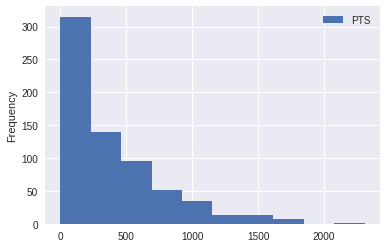

In [0]:
# total points scored looks like this
histogram(nba['PTS'])

In [0]:
nba['PTS'].mean()

385.58246656760775

In [0]:
# The average player scores many fewer points than the average points scored
nba['PTS'].median()

258.0

## Exercises

1. How many players account for 50% of the points scored? Why do some players score so much more than others?

2. How many players would account for 50% of the points if everyone played the same minutes?


3. The entropy of a probability distribution is a measure of how balanced a distribution is: 
https://en.wikipedia.org/wiki/Entropy_(information_theory)
It consists of $\Sigma_i log(p_i) * p_i$ where $p_i$ is the probability of value $i$. Calculate the entropy for the distribution of points for each team. Which team has the highest entropy? Which team has the lowest entropy?
4. Filter the dataset to starters (players GS/G >= 80%). Calculate mean and standard-dev of points/game, rebounds/game, assists/game, 3-pointers/game. Now calculate mean and standard-dev of these stats by position. Which statistic's standard deviation goes down the most?
